# Results

This notebook is created to analyse results from simulations.

## Prerequisites
This notebook will run under the condition that some simulations have been run, e.g.
```
(maxsmi) $ python maxsmi/full_workflow.py --task ESOL --aug-train 5 --aug-test 2
```

Have a look at the [README](https://github.com/t-kimber/maxsmi/blob/main/README.md) page for more details.

In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TASK = "ESOL"
STRING_ENCODING = "smiles"
TRAIN_AUGMENTATION = [0, 3, 6]
TEST_AUGMENTATION = [0, 3]

## Metrics

### r2

In [3]:
def r2_metric(TRAIN_AUGMENTATION, TEST_AUGMENTATION):
    with open(f"output/{TASK}_{STRING_ENCODING}_{TRAIN_AUGMENTATION}_{TEST_AUGMENTATION}/results_metrics.pkl", 'rb') as f: 
        data = pickle.load(f)
        return data.test[0][2]

In [4]:
r2_metric(0,0)

0.6488812102798891

## Plot results

In [5]:
Z = np.zeros((len(TEST_AUGMENTATION), len(TRAIN_AUGMENTATION)))
for i, test in enumerate(TEST_AUGMENTATION):
    for j, train in enumerate(TRAIN_AUGMENTATION):
        Z[i, j] = r2_metric(train, test)
Z

array([[0.64888121, 0.66529054, 0.67841975],
       [0.62911891, 0.764106  , 0.70848751]])

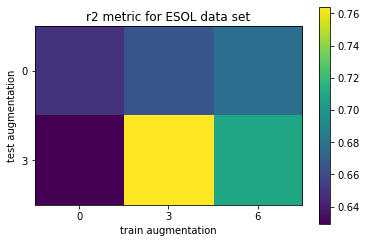

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(Z)
ax.set_xlabel("train augmentation")
ax.set_ylabel("test augmentation")
ax.set_xticks(np.array([0, 1, 2]))
ax.set_xticklabels(TRAIN_AUGMENTATION)
ax.set_yticks(np.array([0, 1]))
ax.set_yticklabels(TEST_AUGMENTATION)
ax.set_title(f"r2 metric for {TASK} data set")
fig.colorbar(im) # adding the colobar on the right
plt.show()